In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import classification_report

In [6]:
fs=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fs.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32') 

In [10]:
re=784
X_train= X_train.reshape(60000,re) 
X_test = X_test.reshape(10000,re) 

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [13]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
#Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [14]:
Y_test[0]

9

In [15]:
#sgd

In [16]:
model1=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model1=model1.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8670 - accuracy: 0.7298 - val_loss: 0.6591 - val_accuracy: 0.7818
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6149 - accuracy: 0.8029 - val_loss: 0.5822 - val_accuracy: 0.8058
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5606 - accuracy: 0.8183 - val_loss: 0.5448 - val_accuracy: 0.8178
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5311 - accuracy: 0.8265 - val_loss: 0.5251 - val_accuracy: 0.8240
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5121 - accuracy: 0.8309 - val_loss: 0.5069 - val_accuracy: 0.8284
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4982 - accuracy: 0.8348 - val_loss: 0.4971 - val_accuracy: 0.8318
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4873 - accuracy: 0.8376 - val_loss: 0.4880 - val_accuracy:

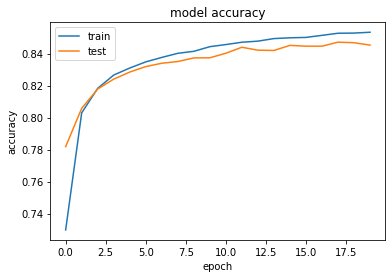

In [18]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

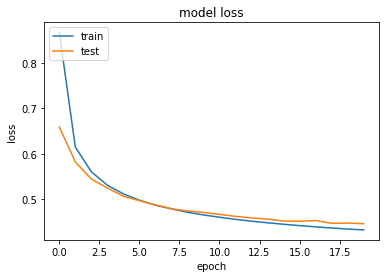

In [19]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [20]:
Y_pred1=model1.predict(X_test)

In [21]:
Y_pred1[0]

array([9.6794411e-06, 6.6679531e-06, 9.2959723e-05, 1.9948338e-05,
       7.7031567e-05, 1.0857755e-01, 1.4356997e-04, 1.9488059e-01,
       6.5245796e-03, 6.8966746e-01], dtype=float32)

In [22]:
Y_pred1=Y_pred1.argmax(axis=1)

In [23]:
Y_pred1[0]

9

In [24]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1000
           1       0.98      0.95      0.96      1000
           2       0.69      0.77      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.74      0.72      0.73      1000
           5       0.94      0.90      0.92      1000
           6       0.61      0.58      0.59      1000
           7       0.90      0.91      0.91      1000
           8       0.93      0.94      0.93      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [25]:
#mini-batch

In [26]:
model2=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model2=model2.fit(X_train,Y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 5s 7ms/step - loss: 1.0489 - accuracy: 0.6766 - val_loss: 0.7681 - val_accuracy: 0.7544
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.7131 - accuracy: 0.7738 - val_loss: 0.6614 - val_accuracy: 0.7866
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.6381 - accuracy: 0.7962 - val_loss: 0.6118 - val_accuracy: 0.8007
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.5978 - accuracy: 0.8079 - val_loss: 0.5817 - val_accuracy: 0.8073
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.5709 - accuracy: 0.8160 - val_loss: 0.5598 - val_accuracy: 0.8146
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.5518 - accuracy: 0.8209 - val_loss: 0.5443 - val_accuracy: 0.8195
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.5370 - accuracy: 0.8255 - val_loss: 0.5319 - val_accuracy: 0.8230
Epoch 

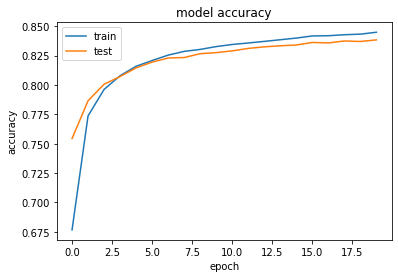

In [28]:
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

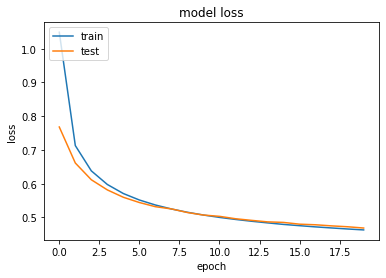

In [29]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
Y_pred2=model2.predict(X_test)
Y_pred2=Y_pred2.argmax(axis=1)
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.97      0.94      0.95      1000
           2       0.73      0.71      0.72      1000
           3       0.83      0.85      0.84      1000
           4       0.70      0.80      0.74      1000
           5       0.94      0.88      0.91      1000
           6       0.63      0.51      0.56      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.94      0.93      1000
           9       0.90      0.95      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [31]:
#adam

In [32]:
model3=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model3=model3.fit(X_train,Y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 6s 8ms/step - loss: 0.6857 - accuracy: 0.7716 - val_loss: 0.5224 - val_accuracy: 0.8251
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4953 - accuracy: 0.8328 - val_loss: 0.4765 - val_accuracy: 0.8384
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4598 - accuracy: 0.8425 - val_loss: 0.4579 - val_accuracy: 0.8437
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4416 - accuracy: 0.8498 - val_loss: 0.4572 - val_accuracy: 0.8378
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4294 - accuracy: 0.8532 - val_loss: 0.4438 - val_accuracy: 0.8478
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4202 - accuracy: 0.8550 - val_loss: 0.4352 - val_accuracy: 0.8510
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4142 - accuracy: 0.8564 - val_loss: 0.4318 - val_accuracy: 0.8514
Epoch 

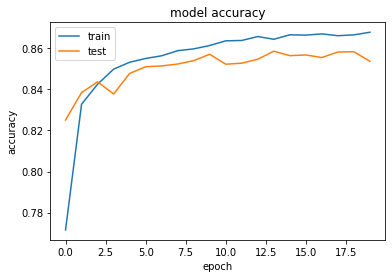

In [34]:
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

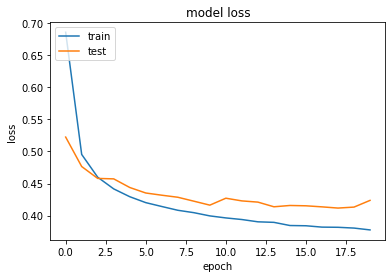

In [35]:
plt.plot(trained_model3.history['loss'])
plt.plot(trained_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [36]:
Y_pred3=model3.predict(X_test)
Y_pred3=Y_pred3.argmax(axis=1)
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.85      0.85      0.85      1000
           4       0.66      0.83      0.74      1000
           5       0.94      0.94      0.94      1000
           6       0.73      0.42      0.53      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [37]:
#adam1

In [38]:
model4=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [39]:
model4.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model4=model4.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6297 - accuracy: 0.7882 - val_loss: 0.4966 - val_accuracy: 0.8359
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4732 - accuracy: 0.8389 - val_loss: 0.4806 - val_accuracy: 0.8341
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4452 - accuracy: 0.8478 - val_loss: 0.4487 - val_accuracy: 0.8431
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4292 - accuracy: 0.8533 - val_loss: 0.4394 - val_accuracy: 0.8508
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4175 - accuracy: 0.8555 - val_loss: 0.4432 - val_accuracy: 0.8443
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4112 - accuracy: 0.8575 - val_loss: 0.4517 - val_accuracy: 0.8447
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4054 - accuracy: 0.8599 - val_loss: 0.4200 - val_accuracy:

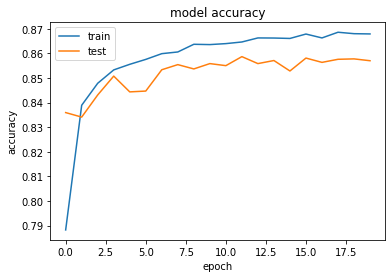

In [40]:
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

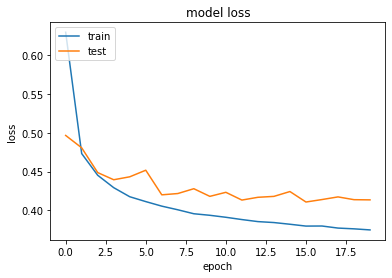

In [41]:
plt.plot(trained_model4.history['loss'])
plt.plot(trained_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [42]:
Y_pred4=model4.predict(X_test)
Y_pred4=Y_pred4.argmax(axis=1)
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.69      0.73      1000
           3       0.80      0.88      0.84      1000
           4       0.70      0.80      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.94      0.95      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [43]:
#adagrad

In [44]:
model5=tf.keras.Sequential([
       tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [45]:
model5.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model5=model5.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3449 - accuracy: 0.6118 - val_loss: 1.0446 - val_accuracy: 0.6929
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.9721 - accuracy: 0.7008 - val_loss: 0.9013 - val_accuracy: 0.7198
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8758 - accuracy: 0.7210 - val_loss: 0.8350 - val_accuracy: 0.7327
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8236 - accuracy: 0.7336 - val_loss: 0.7947 - val_accuracy: 0.7411
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7890 - accuracy: 0.7418 - val_loss: 0.7657 - val_accuracy: 0.7461
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7635 - accuracy: 0.7488 - val_loss: 0.7439 - val_accuracy: 0.7532
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7436 - accuracy: 0.7546 - val_loss: 0.7269 - val_accuracy:

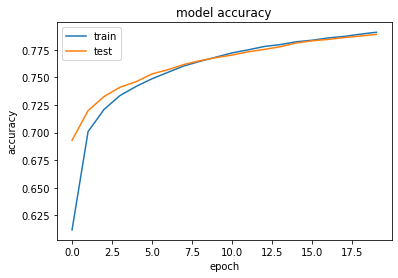

In [46]:
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

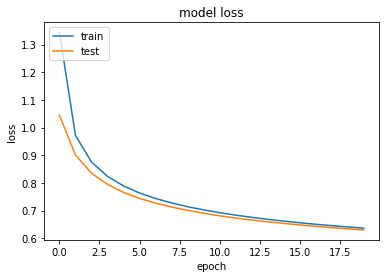

In [47]:
plt.plot(trained_model5.history['loss'])
plt.plot(trained_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [48]:
Y_pred5=model5.predict(X_test)
Y_pred5=Y_pred5.argmax(axis=1)
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1000
           1       0.96      0.92      0.94      1000
           2       0.68      0.64      0.66      1000
           3       0.76      0.85      0.80      1000
           4       0.62      0.75      0.68      1000
           5       0.95      0.70      0.80      1000
           6       0.54      0.36      0.43      1000
           7       0.79      0.89      0.83      1000
           8       0.90      0.94      0.92      1000
           9       0.82      0.94      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



In [49]:
#rmsprop

In [50]:
model6=tf.keras.Sequential([
       tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [51]:
model6.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model6=model6.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6105 - accuracy: 0.7924 - val_loss: 0.5039 - val_accuracy: 0.8231
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4777 - accuracy: 0.8391 - val_loss: 0.4656 - val_accuracy: 0.8447
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4554 - accuracy: 0.8491 - val_loss: 0.4615 - val_accuracy: 0.8476
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4442 - accuracy: 0.8516 - val_loss: 0.4650 - val_accuracy: 0.8433
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4354 - accuracy: 0.8551 - val_loss: 0.4678 - val_accuracy: 0.8458
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4315 - accuracy: 0.8569 - val_loss: 0.4530 - val_accuracy: 0.8525
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4275 - accuracy: 0.8591 - val_loss: 0.4545 - val_accurac

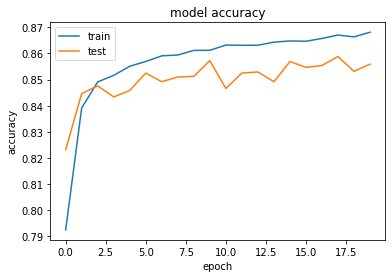

In [52]:
plt.plot(trained_model6.history['accuracy'])
plt.plot(trained_model6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

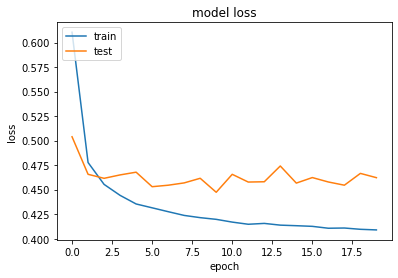

In [53]:
plt.plot(trained_model6.history['loss'])
plt.plot(trained_model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [54]:
Y_pred6=model6.predict(X_test)
Y_pred6=Y_pred6.argmax(axis=1)
print(classification_report(Y_test,Y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.78      0.67      0.72      1000
           3       0.82      0.88      0.85      1000
           4       0.68      0.83      0.75      1000
           5       0.96      0.92      0.94      1000
           6       0.62      0.56      0.59      1000
           7       0.92      0.94      0.93      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [ ]:
#adam extra

In [55]:
model7=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [56]:
model7.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model7=model7.fit(X_train,Y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6257 - accuracy: 0.7885 - val_loss: 0.4893 - val_accuracy: 0.8325
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4731 - accuracy: 0.8381 - val_loss: 0.4527 - val_accuracy: 0.8469
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4449 - accuracy: 0.8469 - val_loss: 0.4396 - val_accuracy: 0.8478
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4267 - accuracy: 0.8533 - val_loss: 0.4489 - val_accuracy: 0.8422
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4192 - accuracy: 0.8551 - val_loss: 0.4261 - val_accuracy: 0.8549
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4101 - accuracy: 0.8592 - val_loss: 0.4433 - val_accuracy: 0.8440
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4050 - accuracy: 0.8598 - val_loss: 0.4422 - val_accuracy

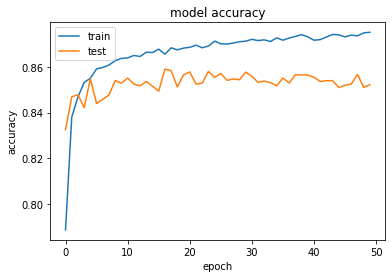

In [57]:
plt.plot(trained_model7.history['accuracy'])
plt.plot(trained_model7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

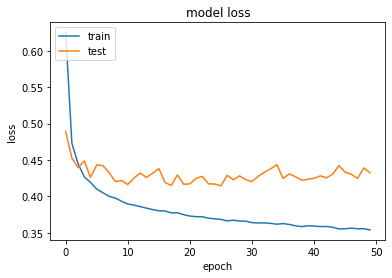

In [58]:
plt.plot(trained_model7.history['loss'])
plt.plot(trained_model7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [59]:
Y_pred7=model7.predict(X_test)
Y_pred7=Y_pred7.argmax(axis=1)
print(classification_report(Y_test,Y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.84      0.85      0.84      1000
           4       0.78      0.70      0.74      1000
           5       0.95      0.93      0.94      1000
           6       0.58      0.65      0.61      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

